# Scatter Plots

A __scatterplot__ is a two dimensional plot similar to the line plots. 

The scatter function takes an x-axis value as a first argument and y-axis value as the second. If the two arguments are the same, we get a nice diagonal alignment of points.

In [3]:
#Matplotlib is really based on numpy arrays
import numpy as np

import matplotlib.pyplot as plt

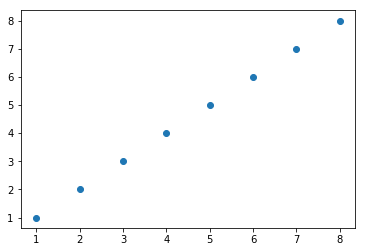

In [4]:
x = np.array( [1,2,3,4,5,6,7,8] )
y = x

plt.figure()
plt.scatter(x,y)

Above, plot has a diagonal line and matplotlib has sized axes accordingly.

8


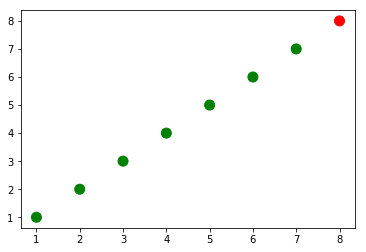

In [5]:
x = np.array( [1,2,3,4,5,6,7,8] )
y = x

print(len(x))
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()
plt.scatter(x, y, s=100, c=colors)  #s=size

For plotting its useful to have some knowledge of:
- List Comprehensions
- Lambdas
- zip function
- List unpacking

In [6]:
# zip function

zip_generator = zip( [1,2,3,4,5] , [6,7,8,9,10] )
list(zip_generator)   #Returns a list of pair-wise tuples

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

In [7]:
# List Unpacking

zip_generator = zip( [1,2,3,4,5] , [6,7,8,9,10] )
x,y = zip(*zip_generator)
print("x:{} and y:{}".format(x,y))

x:(1, 2, 3, 4, 5) and y:(6, 7, 8, 9, 10)


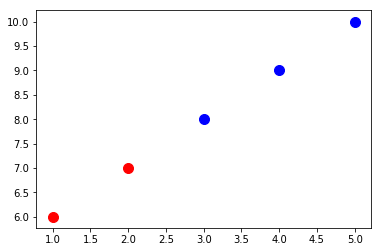

In [8]:
# Slicing the above two lists into two lists and plotting them in different colors.

plt.figure()
plt.scatter(x[:2] , y[:2] , s=100 , c='red' , label='Tall Students')    #label is used for Legend
plt.scatter(x[2:] , y[2:] , s=100 , c='blue' , label='Short Students')

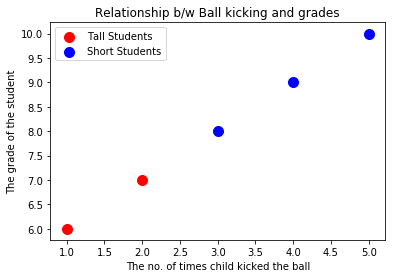

In [9]:
#Labels

plt.figure()
plt.scatter(x[:2] , y[:2] , s=100 , c='red' , label='Tall Students')    #label is used for Legend
plt.scatter(x[2:] , y[2:] , s=100 , c='blue' , label='Short Students')

plt.xlabel("The no. of times child kicked the ball")
plt.ylabel("The grade of the student")
plt.title("Relationship b/w Ball kicking and grades")
plt.legend()

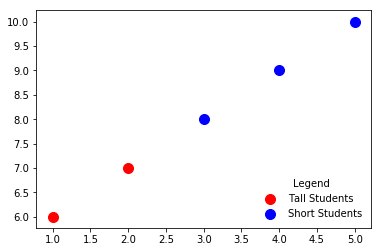

In [10]:
plt.figure()
plt.scatter(x[:2] , y[:2] , s=100 , c='red' , label='Tall Students')    #label is used for Legend
plt.scatter(x[2:] , y[2:] , s=100 , c='blue' , label='Short Students')

plt.legend(loc=4 , frameon=False, title='Legend')

__Legend__ itself is an __Artist__ which means that it can contain children.

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

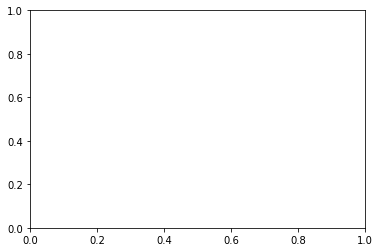

In [11]:
plt.gca().get_children()

# Line Plots

A __line plot__ is created with the plot function and plots a number of different series of data points connecting each series in a point with a line.

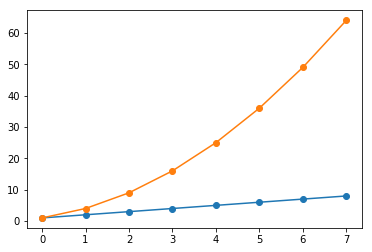

In [12]:
#We use numpy to create a linear series of data.

#Broadcasting in numpy can be used to do this task efficiently.

import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
quadratic_data = linear_data**2

plt.figure()
plt.plot(linear_data , '-o' , quadratic_data, '-o')   # -o flag

So there are a couple of things which are new about this versus the scatter plots.
First, we only gave y-axes values to the plot call, no x-axes values. Instead, the plot function was smart enough to figure out that what we wanted was to use the index of the series as the x value which is pretty handy when we want to make quick plots.

Second we see that the plot identifies this as two series of data and that the colors of the data from the series are different including the data points and the lines between the data points. This is different from the scatter plot which required us to label the lines directly.

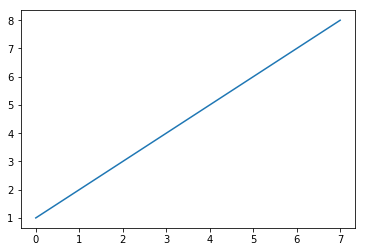

In [13]:
plt.plot(linear_data)

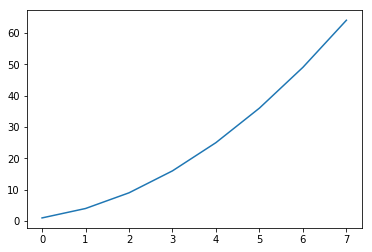

In [14]:
plt.plot(quadratic_data)

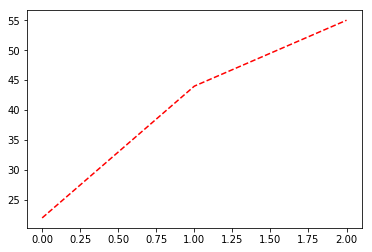

In [15]:
plt.plot([22,44,55] , '--r')

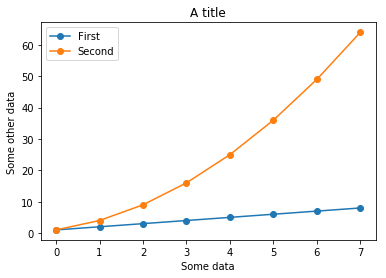

In [16]:
linear_data = np.array([1,2,3,4,5,6,7,8])
quadratic_data = linear_data**2

plt.figure()
plt.plot(linear_data , '-o' , quadratic_data, '-o')

plt.xlabel("Some data")
plt.ylabel("Some other data")
plt.title("A title")
plt.legend(["First" , "Second"])

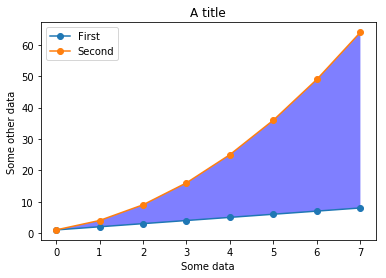

In [17]:
linear_data = np.array([1,2,3,4,5,6,7,8])
quadratic_data = linear_data**2

plt.figure()
plt.plot(linear_data , '-o' , quadratic_data, '-o')

plt.xlabel("Some data")
plt.ylabel("Some other data")
plt.title("A title")
plt.legend(["First" , "Second"])

plt.gca().fill_between( range( len(linear_data) ),
                       linear_data, quadratic_data,
                       facecolor='blue',
                       alpha=0.5)

This is a great way to show, for instance, the __standard deviation of results__ or __error bars.__

Now,Let's change our x-axis to a series of eight date time instances.

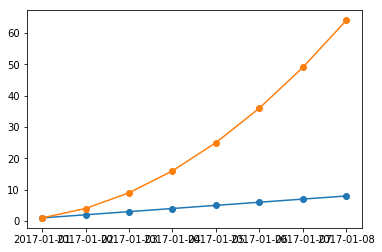

In [18]:
plt.figure()

#Numpy arange()  function can be used to sample some dates.
observation_dates = np.arange( '2017-01-01' , '2017-01-09' , dtype="datetime64[D]")

plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')


    It doesn't give the required results.
    
__Date-Time handling__ is one of the pain points in Data Science.
The standard library does it in two different ways, while NumPy, which is used for scientific computing, does it a third way. 
Also there are probably a dozen replacement libraries for date times in Python.

__Solution:__ The solution to be used here comes from a __helper library in Pandas__ called __to datetime__. This specifically converts NumPy dates into standard library dates which is what matplotlib is expecting.

RuntimeError: matplotlib does not support generators as input

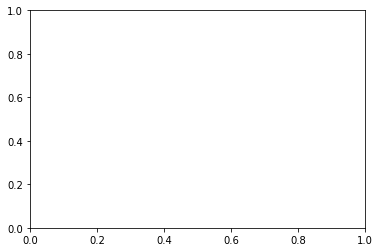

In [19]:
import pandas as pd

plt.figure()
observation_dates = np.arange( '2017-01-01' , '2017-01-09' , dtype="datetime64[D]")

# The map() function will apply the Pandas 'to datetime' against
# each of the elements in observation_dates, and return the result.
observation_dates = map( pd.to_datetime , observation_dates)

plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

That resulted in error.Tthe problem is the map function returns an iterator. Matplotlib can't handle the iterator, so we need to convert it to a list first.

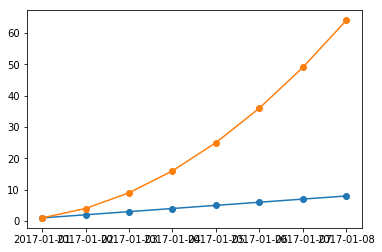

In [20]:
import pandas as pd

plt.figure()
observation_dates = np.arange( '2017-01-01' , '2017-01-09' , dtype="datetime64[D]")

# The map() function will apply the Pandas 'to datetime' against
# each of the elements in observation_dates, and return the result.
observation_dates = list(map( pd.to_datetime , observation_dates))    # mapping to list is not memory efficient

plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

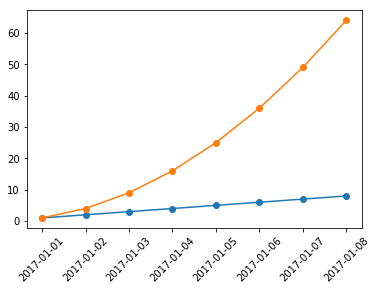

In [21]:
plt.figure()
observation_dates = np.arange( '2017-01-01' , '2017-01-09' , dtype="datetime64[D]")

# The map() function will apply the Pandas 'to datetime' against
# each of the elements in observation_dates, and return the result.
observation_dates = list(map( pd.to_datetime , observation_dates))    # mapping to list is not memory efficient

plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)
    
#plt.subplots_adjust(bottom=0.25)

Text(0.5,1,'Quadratic ($x^2$) vs Linear ($x$) Performance')

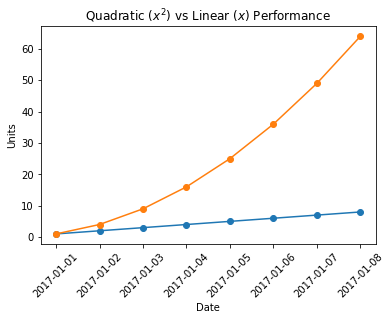

In [22]:
plt.figure()
observation_dates = np.arange( '2017-01-01' , '2017-01-09' , dtype="datetime64[D]")

# The map() function will apply the Pandas 'to datetime' against
# each of the elements in observation_dates, and return the result.
observation_dates = list(map( pd.to_datetime , observation_dates))    # mapping to list is not memory efficient

plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)
    
    
ax=plt.gca()
ax.set_xlabel("Date")
ax.set_ylabel("Units")
ax.set_title("Quadratic vs Linear Performance")
ax.set_title("Quadratic ($x^2$) vs Linear ($x$) Performance")

Matplotlib has a fairly strong connection to __LaTeX__ (a type setting languag)e used by mathematicians and scientists. This means that we can use a subset of LaTeX directly in our labels then matplotlib will render them as equations Here, for instance, we can set the title of the axes so that there's an x squared directly in it. We do this by escaping to LaTeX math mode with dollar signs.

Note that this works regardless of whether we have LaTeX installed. But with a full LaTeX installation, we can have significant control over text formatting.

# Bar Charts

Matplotlib has support for several kinds of bar charts. The most general case, we plot a bar chart by sending in a parameter of the x components, and a parameter of the height of the bar.

<BarContainer object of 8 artists>

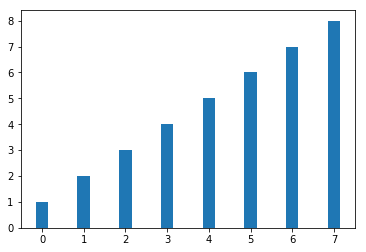

In [25]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals , linear_data, width=0.3)

In [26]:
type(xvals)

range

<BarContainer object of 8 artists>

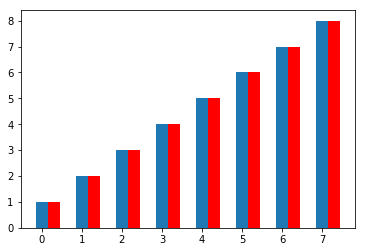

In [29]:
plt.figure()
xvals = range(len(linear_data))
xvals_new = []   # list

for item in xvals:
    xvals_new.append(item+0.3)

plt.bar(xvals , linear_data, width=0.3)
plt.bar(xvals_new , linear_data, width=0.3,color='red')

<BarContainer object of 8 artists>

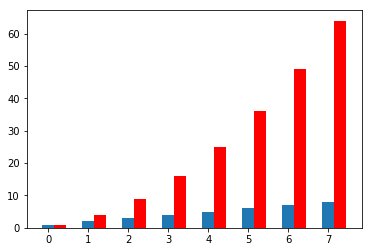

In [30]:
plt.figure()
xvals = range(len(linear_data))
xvals_new = []   # list

for item in xvals:
    xvals_new.append(item+0.3)

plt.bar(xvals , linear_data, width=0.3)
plt.bar(xvals_new , quadratic_data, width=0.3,color='red')

[4, 12, 4, 8, 0, 5, 1, 10]


<BarContainer object of 8 artists>

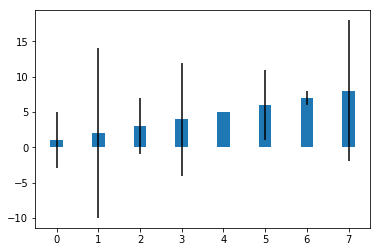

In [33]:
# Adding error bars
from random import randint

linear_err = [ randint(0,15) for x in range(len(linear_data)) ] 
print(linear_err)
plt.bar( xvals , linear_data , width=0.3 , yerr= linear_err)

<BarContainer object of 8 artists>

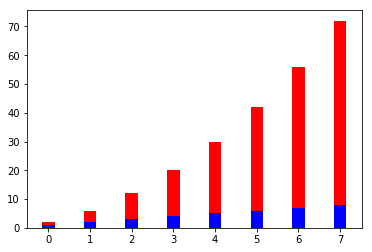

In [36]:
# Stacked bar chart

plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals , linear_data , width=0.3 , color='b')
plt.bar(xvals , quadratic_data , width=0.3 , bottom=linear_data , color='r')

<BarContainer object of 8 artists>

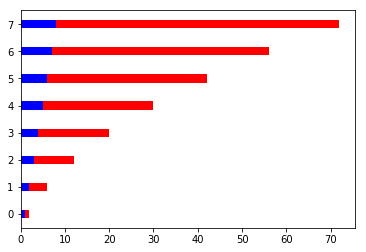

In [38]:
# Pivoting bar graph to a horizontal bar graph
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals , linear_data , height=0.3 , color='b')
plt.barh(xvals , quadratic_data , height=0.3 , left=linear_data , color='r')

# Dejunkifying the plot

We will take a regular Matplotlib plot and applying __Tufte's principles of data-ink ratio and chartjunk__ to make it just a little bit better.

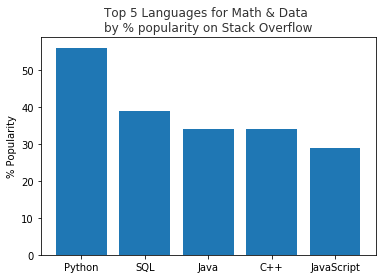

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)
plt.show()

__Task 1:__ Remove all the ticks (both axes), and tick labels on the Y axis.

C:\Users\sakshi aggarwal\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


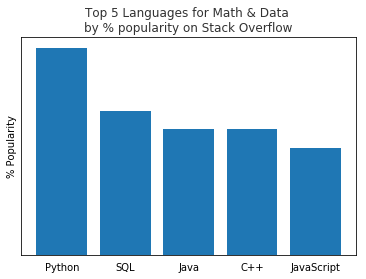

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.show()

__Task 2:__ Remove the frame of the chart.

C:\Users\sakshi aggarwal\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


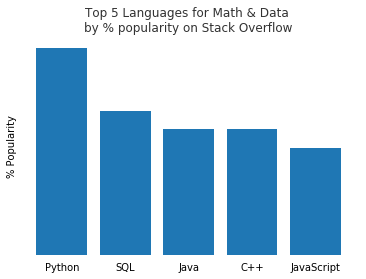

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

__Task 3:__ Change the bar colors to be less bright blue, make one bar, the python bar, a contrasting color, soften all labels by turning grey.

C:\Users\sakshi aggarwal\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


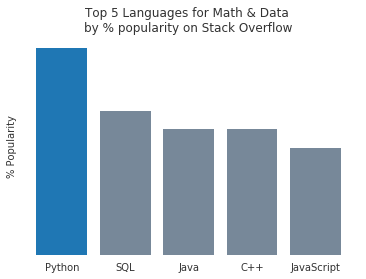

In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')

# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

__Task 4:__ Directly label each bar with Y axis values, and remove the Y label since bars are directly labeled.

C:\Users\sakshi aggarwal\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


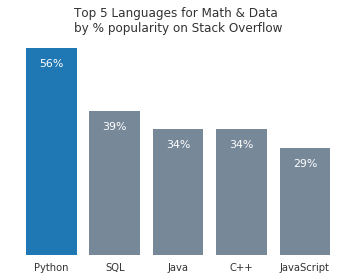

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')

# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)

# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()